In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import process_utility as psu
import scipy.integrate as integ
from scipy.optimize import curve_fit
import time

In [2]:
data = psu.read_file('data/2020_11_09/SiPM1_27_5_LED2p75.dat')

data/2020_11_09/SiPM1_27_5_LED2p75.dat Number of events 303153.0


[66,
 71,
 89,
 92,
 95,
 98,
 176,
 183,
 193,
 195,
 373,
 377,
 410,
 413,
 485,
 488,
 514,
 521,
 543,
 545,
 638,
 642,
 672,
 676,
 729,
 733,
 833,
 836,
 851,
 855,
 883,
 885]

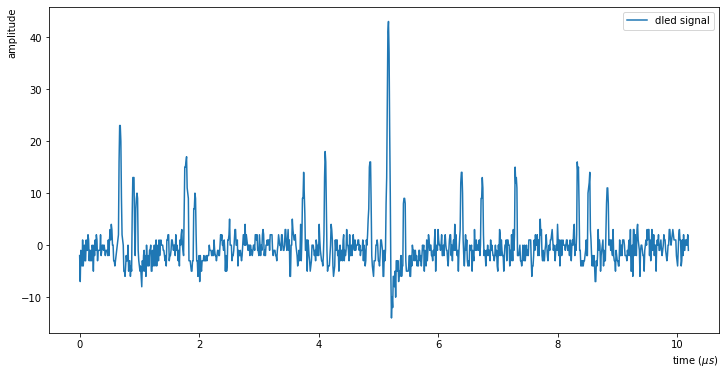

In [232]:
plt.figure(figsize=(12,6))
psu.search_peaks(dts, data[0], 4, 9, 1)

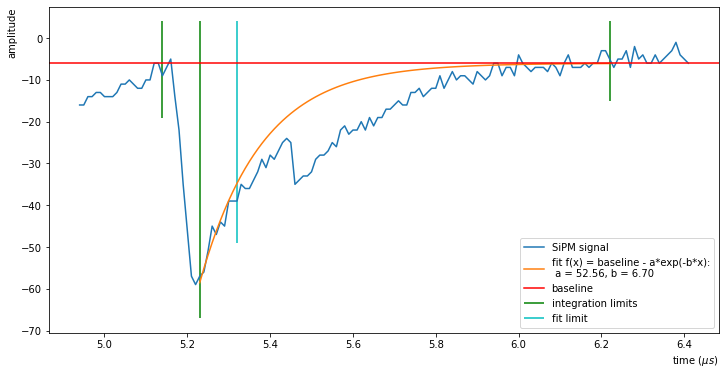

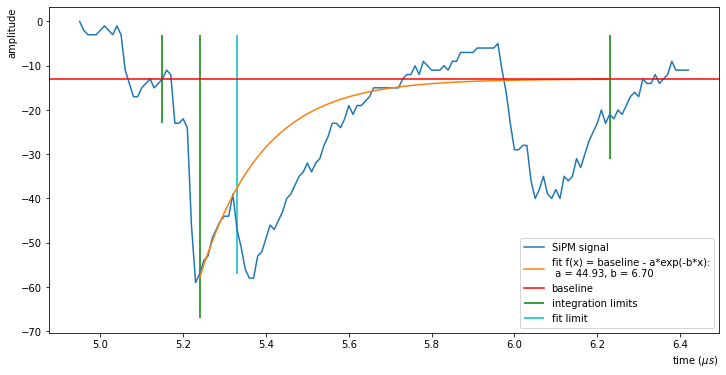

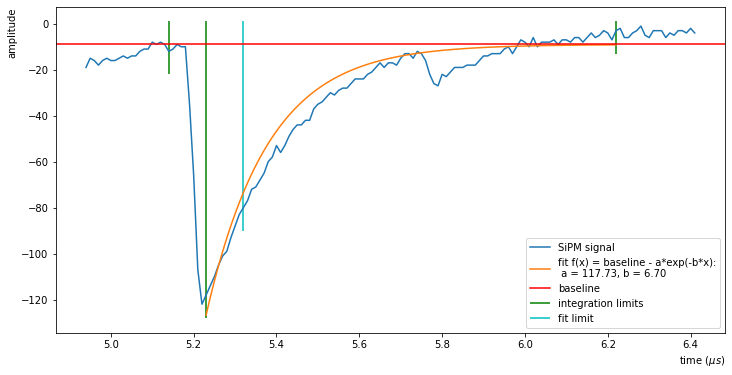

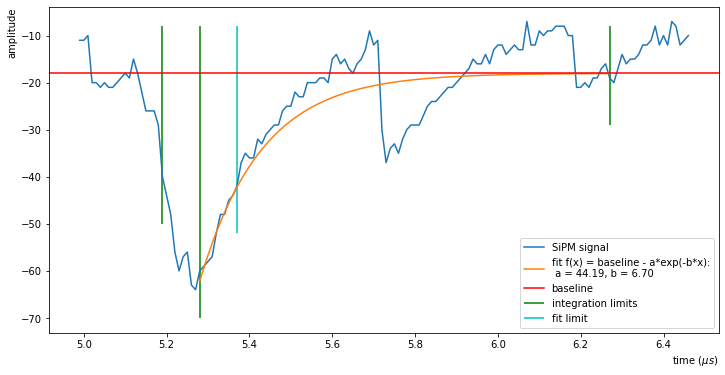

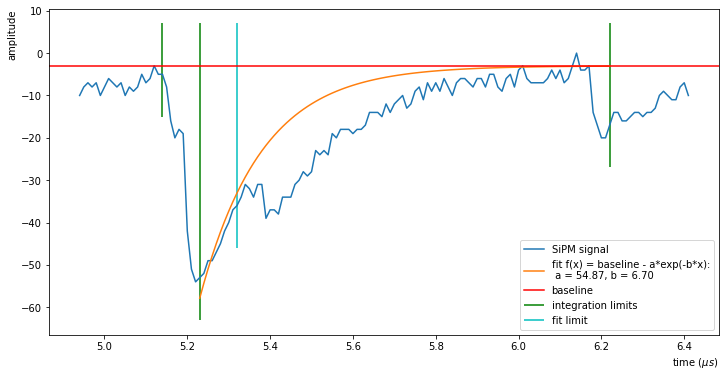

In [228]:
for i in range(5):
    plt.figure(figsize=(12,6))
    dts = np.arange(0,data.shape[1]*10,10)
    listpeaks = psu.search_peaks(dts, data[i], 4, 9, False)
    psu.integral_central_peak(data[i],listpeaks, dtl=-8, dtr=1, tfit=10,
                              tlim=100,tc=5,tll=2,tlr=10,plot=1)

In [ ]:
nn = len(data)
peakint = np.zeros(nn)
print('Total events:',nn)
t_start = time.time()
for i in range(nn):
    listpeaks = psu.search_peaks(dts, data[i], 4, 9, False)
    peakint[i] = psu.integral_central_peak(data[i],listpeaks,-8,1,10,100,5,8,10)
    diff = time.time() - t_start
    if (i % 1000) == 0:
        print(f'event n. {i} area: {peakint[i]:.2f}, time to process: {diff:.2f}')
psu.histo_plot(peakint,0.1,40,500)

In [204]:
def histo_fit(peaks_integral, a = 1, b = 15, bins = 100, plot = False):
    h, t = np.histogram(peaks_integral, bins=bins, range=(a,b))
    
    # search first 2 peaks
    tmax = np.argmax(h)
    hmax = h[tmax]
    idxp = np.where(h > hmax/5)
    tmax0, hmax0 = h[idxp[0][0]], h[idxp[0][0]]
    i = 1
    while h[i+idxp[0][0]] > hmax0:
        tmax0 = t[i+idxp[0][0]]
        hmax0 = h[i+idxp[0][0]]
        i += 1
    ii, idx1 = 0, idxp[0][i]
    while idxp[0][ii+1]-idxp[0][ii] <= 1:
        idx1 = idxp[0][ii+2]
        ii += 1
    iii = 1
    tmax1, hmax1 = t[idx1], h[idx1]
    while h[idx1+iii] > hmax1:
        tmax1 = t[iii+idx1]
        hmax1 = h[iii+idx1]
        iii += 1
    
    ################################################
    if plot:
        plt.figure(figsize=(12,6))
        plt.plot(t[:bins], h, marker = '.', linestyle = '', label = 'data')
        plt.xlabel(r'area ($ADC\times \mu$s)',ha='right',x=1)
        plt.ylabel('number of events',ha='right',y=1)
    for i in range(4):
        pmax = (i+1)*(tmax1-tmax0)+(2*tmax0-tmax1)
        h0, t0 = np.histogram(peaks_integral, bins=100,range=(pmax-1,pmax+1))
        mu = t0[np.argmax(h0)]
        imax = np.argmax(h0)
        hmax = h0[imax]
        idx = np.where(h0>hmax/2) # fwhm 
        ilo, ihi = idx[0][0], idx[0][-1]
        sig = (t0[ihi]-t0[ilo]) / 2.355
        idx = np.where(((t0-mu) > -8 * sig) & ((t0-mu) < 8 * sig))
        idx0 = np.where(((t0-mu) > -4.5 * sig) & ((t0-mu) < 4.5 * sig))
        ilo, ihi = idx[0][0], idx[0][-1]
        ilo0, ihi0 = idx0[0][0], idx0[0][-1]
        t0, h0 = t0[ilo:ihi], h0[ilo:ihi]
        popt, pcov = curve_fit(psu.gaussian, t0, h0, p0 = np.array([hmax, mu,sig]))
        xm = popt[1]
        if plot:
            X = np.linspace(a, b, num  = 100)
            plt.plot(X, psu.gaussian(X, *popt), label = f'gauss: max at {xm:.2f}')
            plt.legend()
    return xm

/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &

12.787235853589358

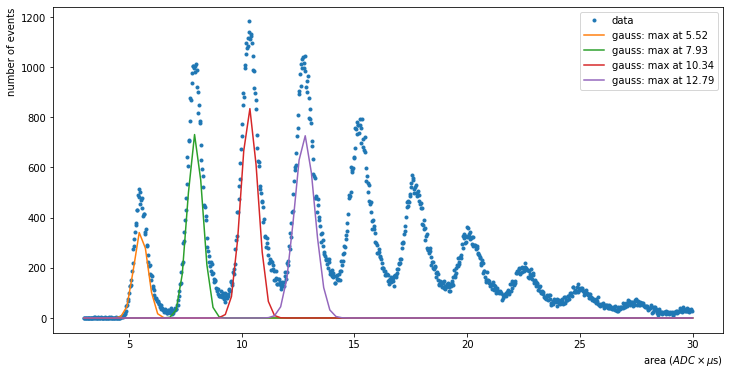

In [205]:
#np.save('peakint_SiPM1_27_5_LED2p75.npy', peakint)
peakint = np.load('peakint_SiPM1_27_5_LED2p75.npy')
histo_fit(peakint,3,30,1000,1)

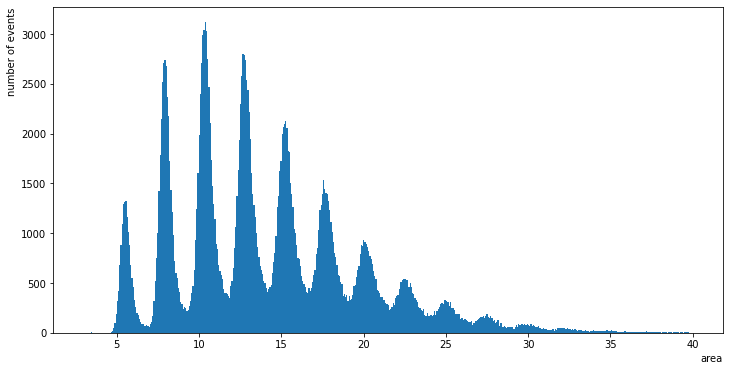

In [17]:
psu.histo_plot(peakint,3,40,500)
# dtl = -8, dtr = 1, tfit = 10 

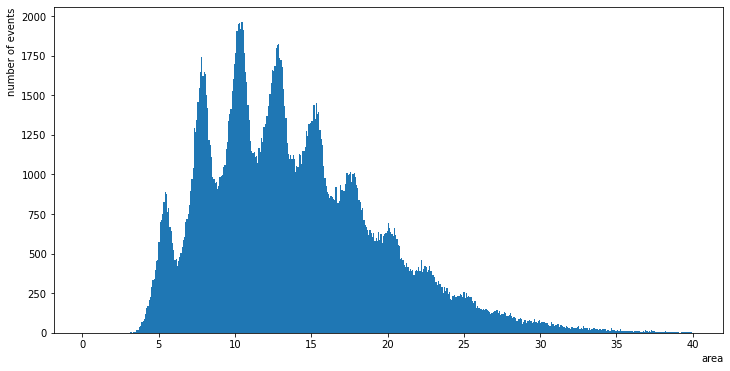

In [5]:
peakint1 = np.load('peakint_SiPM1_27_5_LED2p75_1.npy')
psu.histo_plot(peakint1,0.1,40,500)
# dtl = -2, dtr = 1, tfit = 20
#psu.integral_central_peak(data[i],listpeaks,-2,1,20,100,5,8,10)